## Importing data

In [1]:
from os import path
import urllib
import sys

def check_or_download_file(fullpath):
    filename = path.basename(fullpath)
    print(filename)
    if sys.version_info >= (3, 0):
        if not(path.isfile(filename)):
            urllib.request.urlretrieve(fullpath, filename)
    else:
        if not(path.isfile(filename)):
            urllib.urlretrieve(fullpath, filename)
            
def unzip_file(zipfilename):
    zip = zipfile.ZipFile(zipfilename)
    zip.extractall()

In [2]:
import pandas as pd
import zipfile
    
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'

check_or_download_file(url + zipfilename)
unzip_file(zipfilename)

# read csv
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000, na_values=na_values, usecols=fields)

household_power_consumption.zip


## 1) Détecter et dénombrer le nombre de lignes ayant des valeurs manquantes.

In [3]:
df[df["Global_active_power"].isnull()]

,Date,Time,Global_active_power
6839,21/12/2006,11:23:00,NaN
6840,21/12/2006,11:24:00,NaN
19724,30/12/2006,10:08:00,NaN
19725,30/12/2006,10:09:00,NaN
41832,14/1/2007,18:36:00,NaN
61909,28/1/2007,17:13:00,NaN
98254,22/2/2007,22:58:00,NaN
98255,22/2/2007,22:59:00,NaN
142588,25/3/2007,17:52:00,NaN
190497,28/4/2007,00:21:00,NaN


## 2) Supprimer toutes les lignes avec des valeurs manquantes.

In [4]:
df.dropna(inplace=True)
df

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666
5,16/12/2006,17:29:00,3.520
6,16/12/2006,17:30:00,3.702
7,16/12/2006,17:31:00,3.700
8,16/12/2006,17:32:00,3.668
9,16/12/2006,17:33:00,3.662


## 3) Créer une Time Series

In [5]:
df.set_index(pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S'), inplace=True)
df

,Date,Time,Global_active_power
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666
2006-12-16 17:29:00,16/12/2006,17:29:00,3.520
2006-12-16 17:30:00,16/12/2006,17:30:00,3.702
2006-12-16 17:31:00,16/12/2006,17:31:00,3.700
2006-12-16 17:32:00,16/12/2006,17:32:00,3.668
2006-12-16 17:33:00,16/12/2006,17:33:00,3.662


## 4) Afficher le graphique des moyennes journalières entre le 1er janvier et le 30 avril 2007.

In [6]:
df_range = df['2007-01-01':'2007-04-30']
means = df_range.groupby(df_range.index.date).mean()
means.set_index(pd.to_datetime(means.index), inplace=True)

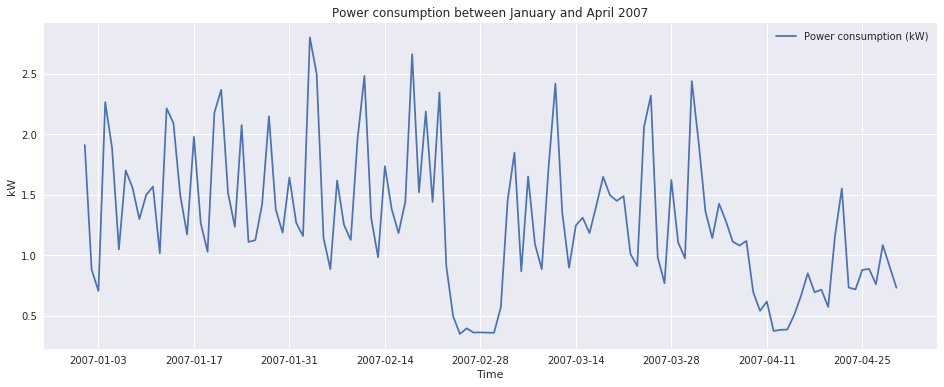

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, ax = plt.subplots(figsize=(16,6))
plt.title('Power consumption between January and April 2007')
ax.set_xlabel('Time')
ax.set_ylabel('kW')
ax.plot(means)
ax.legend(['Power consumption (kW)'])

On constate deux fortes chutes de la consommation éléctrique fin février et début avril. On peut émettre l'hypothèse que 
la température a fortement augmenté durant ces deux périodes.

## 5) Chargement des données suplémentaires concernant la température

In [8]:
tp_url = 'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/'
temperature_filename = 'TG_STAID011249.txt'

# fetch file
check_or_download_file(tp_url + temperature_filename)

TG_STAID011249.txt


In [9]:
date_converter = lambda date_string: pd.to_datetime(date_string, format='%Y%m%d')

na_values2 = ['?', '', 'NaN', 'Nan', 'nan']
temperature_df = pd.read_csv(temperature_filename, sep=',', na_values=['-9999'], skiprows=20, skipinitialspace=True, usecols=['DATE', 'TG'], dtype={'TG': float}, converters={'DATE': date_converter})
temperature_df.dropna(inplace=True)
temperature_df['TG'] = temperature_df['TG'] / 10
temperature_df.set_index('DATE', inplace=True)
temperature_df


,TG
DATE,
1921-03-01,5.0
1921-03-02,4.6
1921-03-03,4.6
1921-03-04,3.1
1921-03-05,9.5
1921-03-06,7.2
1921-03-07,5.4
1921-03-08,3.3
1921-03-09,5.0


## 6) Créer une Time Series pandas des températures (1er janvier - 30 avril 2007)

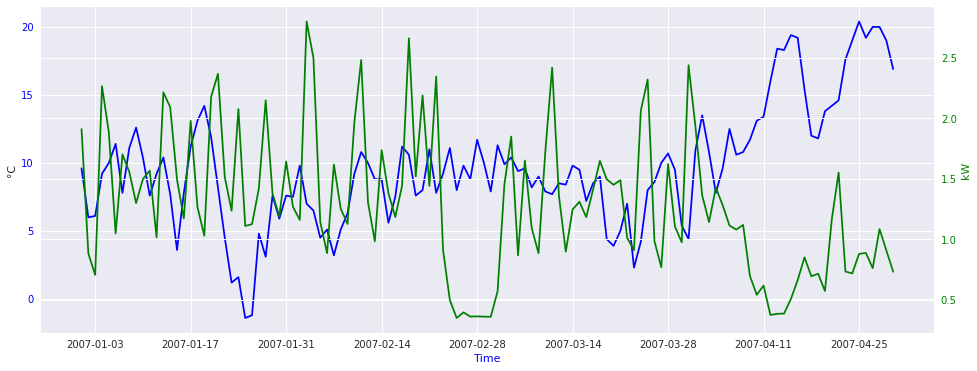

In [10]:
filtered_temperatures = temperature_df['2007-01-01':'2007-04-30']

fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.plot(filtered_temperatures, label='Temperatures (°C)', color='b')
ax1.set_xlabel('Time', color='b')
ax1.set_ylabel('°C')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(means, label='Power consumption (kW)', color='g')
ax2.set_ylabel('kW', color='g')
ax2.tick_params('y', colors='g')

plt.show()

## 7) Proposer une visualisation de la pollution moyenne par année (pour l'ozone).

In [19]:
airparif_zipfile = 'airparifabae1bd78def4fe8a409ab8c95fc4608.zip'

# fetch file
check_or_download_file(tp_url + airparif_zipfile)
unzip_file(airparif_zipfile)

airdf = pd.read_csv(airparif_zipfile, sep=';', na_values=['n/d'], skiprows=[1], usecols=['date', 'heure', 'O3'], dtype={'date': str, 'heure': int})
airdf.dropna(inplace=True)
airdf['heure'] = (airdf['heure'] - 1).astype(str) + ':59:59'
airdf_index = pd.to_datetime(airdf['date'] + ' ' + airdf['heure'], format='%d/%m/%Y %H:%M:%S')
airdf.set_index(airdf_index, inplace=True)
airdf.drop(['date', 'heure'], inplace=True, axis=1)

air_by_year = airdf.groupby(airdf.index.year).apply(lambda g: g['O3'].values)
year_buckets = [ s for s in air_by_year ]
first_year = airdf.index.year[0]
last_year = airdf.index.year[-1]


airparifabae1bd78def4fe8a409ab8c95fc4608.zip


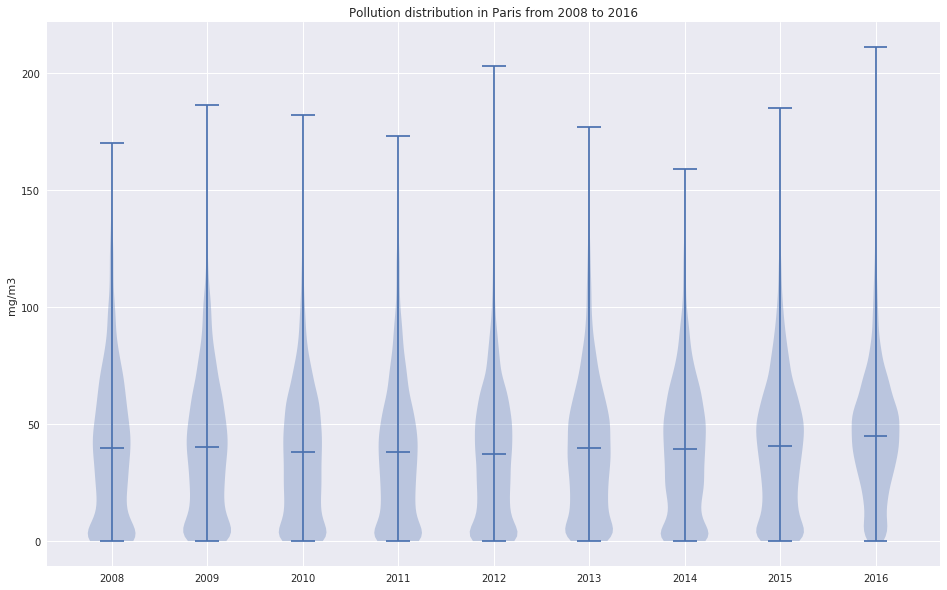

In [20]:
fig, ax = plt.subplots(figsize=(16, 10))

# plot violin plot
ax.violinplot(year_buckets, showmeans=True, showmedians=False)
ax.set_title('Pollution distribution in Paris from 2008 to 2016')

years_ticks = [x + 1 for x in range(last_year - first_year + 1)]
xticks_labels = [str(x) for x in range(first_year, last_year + 1)]

ax.set_xticks(years_ticks)
ax.set_xticklabels(xticks_labels)
ax.set_ylabel('mg/m3')

plt.show()